<a id='inicio'></a>
# Contenidos 

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [4.1.1 Cargar datos](#data_load)
    * [4.1.2 Explorar datos iniciales](#data_explorer)
    * [4.1.3 Conclusiones y siguientes pasos](#data_resume)
* [Etapa 2. Preprocesamiento de datos](#data_preproc)
    * [4.2.1 Valores ausentes](#data_nan)
    * [4.2.2 Corregir los tipos de datos](#data_type)
    * [4.2.3 Enriquecer datos](#data_add)
    * [4.2.4 Comprobar datos limpios](#data_ok)
* [Etapa 3. Análisis de datos](#data_analysis)
    * [4.3.1 Estudiar parámetros principales](#analysis_param)
    * [4.3.2 Estudiar y tratar valores atípicos](#analysis_outliers)
    * [4.3.3 Estudiar parámetros principales sin valores atípicos](#analysis_without_ouliers)
    * [4.3.4 Período de colocación de los anuncios](#analysis_announcements)
    * [4.3.5 Precio promedio por cada tipo de vehículo](#analysis_vehicle)
    * [4.3.6 Factores de precio](#analysis_price)
* [Conclusión general](#conclusion_gral)

# Introducción <a id='intro'></a>

En este trabajo vamos a estudiar los factores que influyen en el precio de venta de un vehículo. Haremos un preprocesamiento de datos y posteriormente un análisis de datos exploratorio.

# Etapas <a id='stage'></a>

Primero vamos a evaluar la calidad de los datos y buscar los problemas son significativos. Posteriormente, durante el preprocesamiento de datos trataremos de solucionar los problemas más críticos.
 
El proyecto consistirá en tres etapas:
 1. Descripción de los datos
 1. Preprocesamiento de datos
 1. Análisis exploratorio de datos
 1. Conclusión general
 
[Volver a Contenidos](#inicio)

<a id='inicio'></a> <a id='data_review'></a>
## Descripción de los datos

En esta sección vamos a cargar las librerías a utilizar para posteriormente revisar las características del set de datos.

In [1]:
# Cargamos todas las librerías
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<a id='data_load'></a>
### Cargar datos

Vamos a crear un DataFrame que contenga los datos.

In [2]:
# Cargamos el archivo de datos en un DataFrame
data_vehiculos=pd.read_csv('vehicles_us.csv')

In [3]:
# Mostramos las columnas que contiene
data_vehiculos.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

<a id='data_explorer'></a>
### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price` — precio en que se oferta el vehículo
- `model_year` — año en que se salió a la venta dicho vehículo
- `model` — nombre del modelo del vehículo
- `condition` — la condición actual en que se encuentra
- `cylinders` — número de cilindros del vehículo
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` — si cuenta con transmisión automática o manual
- `type` — el tipo de vehículo
- `paint_color` — color de la carrocería
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [4]:
# mostramos la información general sobre el DataFrame
data_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# mostramos el número de filas y columnas
data_vehiculos.shape

(51525, 13)

In [6]:
# mostramos una parte de los datos
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Notamos que **tenemos 51,525 filas** y **13 columnas**. Los nombres de las columnas no presentan problemas. Algunas de las columnas presentan datos ausentes. Algunos tipos de datos en las columnas no corresponden con su contenido, por ejemplo; la columna `'date_posted'`contiene datos tipo *'object'* cuando debe ser de tipo fecha.

In [7]:
# buscamos las columnas con datos ausentes
data_vehiculos.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Tenemos **5 columnas con valores ausentes.** La columna `'is_4wd'` tiene casi la mitad de valores ausentes, ello quizás se deba a que es una columna que almacena datos de tipo Booleano y el valor 'NaN' sea el valor contrario al capturado.

[Volver a Contenidos](#inicio) <a id='data_resume'></a>
### Conclusiones y siguientes pasos  

Hay algunas columnas que necesitamos cambiar el tipo de datos, `'date_posted'` a tipo fecha. Algunas otras tienen valores ausentes y en estas hay que tratar de estimar esos valores ausentes o de ser necesario proceder a quitarlos del dataset. Debemos buscar también si en alguna columna con datos categóricos debemos hacer un reemplazo de las categorías o buscar duplicados implícitos.

In [8]:
# obtengamos un resumen de las principales estadísticas del dataset
data_vehiculos.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


[Volver a Contenidos](#inicio) <a id='data_preproc'></a>
## Preprocesamiento de datos

En esta parte del preprocesamiento de datos vamos a revisar las columnas con valores ausentes y aquellas con valores duplicados implícitos, las que no corresponden el tipo de datos que contiene o aquellas que presentan otro tipo de problemas.
<a id='data_nan'></a>
### Valores Ausentes  
Vamos a empezar por identificar las columnas con datos ausentes.

In [9]:
# identificamos las columnas con valores ausentes
data_vehiculos.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

**Reemplazaremos los valores ausentes en la columna `'is_4wd'` por el valor cero. Asumiremos que el valor uno representa el valor booleano 'True' y cero el valor 'False'.**

In [10]:
# empecemos por reemplazar los valores ausentes en la columna
data_vehiculos['is_4wd'].fillna(0,inplace=True)
data_vehiculos.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

A continuación revisaremos las columnas con valores categóricos en búsqueda de problemas a solucionar.

In [11]:
# revisamos la columna 'model'
data_vehiculos['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [12]:
# reemplazamos el valor 'ford f150' por 'ford f-150', el valor 'ford f250' por 'ford f-250' y verificamos el reemplazo
data_vehiculos['model'].replace('ford f150','ford f-150',inplace=True)
data_vehiculos['model'].replace('ford f250','ford f-250',inplace=True)
data_vehiculos['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd',
       'ford f150 supercrew cab xlt', 'ford f250 super duty', 'ford f350',
       'ford f350 super duty', 'ford focus', 'ford focus se',
       'ford fusion'

In [13]:
# revisamos la columna 'condition'
data_vehiculos['condition'].sort_values().unique()

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

In [14]:
# revisamos la columna 'fuel'
data_vehiculos['fuel'].sort_values().unique()

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

In [15]:
# revisamos la columna 'transmission'
data_vehiculos['transmission'].sort_values().unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [16]:
# revisamos la columna 'type'
data_vehiculos['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

In [17]:
# reemplazamos el valor de 'SUV' por 'suv' y verificamos el reemplazo
data_vehiculos['type'].replace('SUV','suv',inplace=True)
data_vehiculos['type'].sort_values().unique()

array(['bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad',
       'other', 'pickup', 'sedan', 'suv', 'truck', 'van', 'wagon'],
      dtype=object)

In [18]:
# revisamos la columna 'paint_color'
data_vehiculos['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [19]:
data_vehiculos.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Para los valores ausentes en la variable `'model_year'`, el reemplazo lo haremos a partir de las frecuencias usando la agrupación de la columna `'model'`. 

Para las siguientes columnas; `'cylinders'`, `'odometer'` y `'paint_color'`, los valores ausentes será dificil hacer un reemplazo ya que, por ejemplo, el valor del kilometraje depende del uso que se le haya dado al vehículo y no del color o modelo del vehículo.  
Para la columna `'cylinders'` vamos a buscar valores de reemplazo agrupando por `'model'` y `'model_year'`, ya que el cilindraje si depende del modelo y año del modelo.

In [20]:
"""creamos un DataFrame agrupado por 'model' y 'model_year' con las frecuencias correspondientes, sin los valores nulos """
data_vehiculos_notna=data_vehiculos[data_vehiculos['model_year'].notna()]
estimados_model=data_vehiculos_notna.pivot_table(index=['model','model_year'],values='condition',aggfunc='count').sort_values(by='model',ascending=False)
estimados_model.reset_index(inplace=True)
estimados_model.columns=(['model','model_year','frecuencia'])
estimados_model.head()

,model,model_year,frecuencia
0,volkswagen passat,2018.0,1
1,volkswagen passat,2007.0,12
2,volkswagen passat,1995.0,1
3,volkswagen passat,1999.0,1
4,volkswagen passat,2000.0,7


[Volver a Contenidos](#inicio)

In [21]:
"""creamos una función que reemplaza los valores ausentes en 'model_year' en base a sus frecuencias,
agrupado por 'model' y 'model_year' """
    
def replace_model_year(row):
    """Esta función reemplaza los valores ausentes en 'model_year'
        estimados_model= el DataFrame que contiene las frecuencias para hacer los reemplazos
    """
    
    # obtenemos el año del vehiculo
    year_car=row['model_year']
  
    if math.isnan(year_car):

        # obtenemos el modelo del vehiculo
        modelo=row['model']
        # obtenemos la frecuencia máxima en base al modelo y año
        frec=estimados_model[estimados_model['model']==modelo]['frecuencia'].max()
        # buscamos esa frecuencia para obtener el año del vehiculo
        try:
            valor_reemplazo=float(estimados_model.loc[(estimados_model['model']==modelo)&(estimados_model['frecuencia']==frec)]['model_year'])
            return valor_reemplazo
        except:
            # si el objeto resultante es una serie, mismas frecuencias para distintos 'model_year' elegimos un año al azar
            valor_reemplazo=estimados_model.loc[(estimados_model['model']==modelo)&(estimados_model['frecuencia']==frec)]['model_year']
            return random.choice(valor_reemplazo.values)
    else:
        valor_reemplazo=row['model_year']
        return valor_reemplazo

In [22]:
# aplicamos la función para hacer los reemplazos en 'model_year'
data_vehiculos['model_year']=data_vehiculos.apply(replace_model_year,axis=1)

In [23]:
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [24]:
data_vehiculos.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Ahora vamos a buscar hacer el reemplazo de los valores ausentes en la columna `'cylinders'`. Para la columna `'cylinders'`, vamos a buscar valores de reemplazo agrupando por `'model'` y usando la mediana de `'cylinders'` como valor de reemplazo.

In [25]:
"""creamos un DataFrame agrupado por 'model' y obtenemos la mediana de 'cylinders', sin los valores nulos """
data_vehiculos_notna=data_vehiculos[data_vehiculos['cylinders'].notna()]
estimados_cylinders=data_vehiculos_notna.pivot_table(index='model',values='cylinders',aggfunc='median').sort_values(by='model',ascending=False)
estimados_cylinders.reset_index(inplace=True)
estimados_cylinders.columns=(['model','cylinders_mediana'])
estimados_cylinders.head()

,model,cylinders_mediana
0,volkswagen passat,4.0
1,volkswagen jetta,4.0
2,toyota tundra,8.0
3,toyota tacoma,6.0
4,toyota sienna,6.0


In [26]:
"""creamos una función que reemplaza los valores ausentes en 'cylinders' en base a su mediana, agrupando por 'model'"""

def replace_model_year(row):
    """Esta función reemplaza los valores ausentes en 'cylinders'
        estimados_cylinders= el DataFrame que contiene las medianas para hacer los reemplazos
    """
    
    # obtenemos el cilindraje del vehiculo
    cilindros=row['cylinders']
  
    # probamos si el cilindraje está ausente
    if math.isnan(cilindros):

        # obtenemos el modelo del vehiculo
        modelo=row['model']
       
        # obtenemos la mediana en base al modelo
        mediana=estimados_cylinders.loc[(estimados_cylinders['model']==modelo)]['cylinders_mediana']
        
        # probamos si ese modelo tiene mediana para el cilindraje o no existe esa combinacion
        if math.isnan(mediana):
            return row['cylinders']
        else:
            valor_reemplazo=float(mediana)
            return valor_reemplazo  
    else:
        return row['cylinders']

In [27]:
# aplicamos la función para hacer los reemplazos en 'cylinders'
data_vehiculos['cylinders']=data_vehiculos.apply(replace_model_year,axis=1)

In [28]:
data_vehiculos.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Hemos eliminado los valores ausentes en la columna `'cylinders'`. Para los valores ausentes en la columna `'paint_color'` vamos a reemplazarlos con 'unknown'.

In [29]:
# reemplazamos los valores ausentes en 'paint_color' con 'unknown'
data_vehiculos['paint_color'].fillna('unknown',inplace=True)
data_vehiculos.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Por el momento, la columna `'odometer'` la dejaremos con esos valores ausentes.

[Volver a Contenidos](#inicio) <a id='data_type'></a>
### Corregir los tipos de datos

Vamos a corregir los datos de la columna `'date_posted'` para que pueda ser tratada con un formato de tipo fecha.

In [30]:
data_vehiculos['date_posted']=pd.to_datetime(data_vehiculos['date_posted'],format='%Y-%m-%d')
data_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


[Volver a Contenidos](#inicio) <a id='data_add'></a>
### Enriquecer datos

Una vez que hemos dado el tipo de formato correcto a la columna `'date_posted'`, vamos a proceder a obtener otras columnas.

In [31]:
"""creamos una función para agregar los años de uso del vehículo cuando se colocó el anuncio"""

def agregar_years(row):
    """Esta función agrega los años de uso del vehículo cuando el anuncio se publicó"""
    
    row['date_posted'].date()
    if math.isnan(row['model_year']):
        return row['model_year']
    else:
        years=row['date_posted'].year-row['model_year']
    return years

In [32]:
# Agregamos los años de uso del vehículo cuando el anuncio se colocó
data_vehiculos['years_used']=data_vehiculos.apply(agregar_years,axis=1)

In [33]:
# verificamos que se haya creado
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,unknown,1.0,2018-06-23,19,7.0
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2.0


In [34]:
""" creamos una función para agregar el millaje del vehículo por año """

def agregar_millas(row):
    """Esta función agrega el millaje del vehículo por año al set de datos
        Si la columna 'years_used' tiene valor cero, la columna 'mill_mean_year' tendrá el valor de 'odometer'
    """
    
    year=row['years_used']
    if year>0:
        millaje=row['odometer']/row['years_used']
        return millaje
    else:
        millaje=row['odometer']
    return millaje

In [35]:
# Agregamos el millaje promedio del vehículo por año
data_vehiculos['mill_mean_year']=data_vehiculos.apply(agregar_millas,axis=1)

In [36]:
# verificamos que se haya creado
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,unknown,1.0,2018-06-23,19,7.0,20714.285714
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5.0,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,16.0,NaN
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2.0,40451.500000


In [37]:
# agregamos el día de la semana, mes y año en que el anunció se colocó
data_vehiculos['day_week']=data_vehiculos['date_posted'].dt.weekday
data_vehiculos['month']=data_vehiculos['date_posted'].dt.month
data_vehiculos['year']=data_vehiculos['date_posted'].dt.year
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,unknown,1.0,2018-06-23,19,7.0,20714.285714,5,6,2018
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5.0,17741.000000,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6.0,18333.333333,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,16.0,NaN,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2.0,40451.500000,1,4,2019


In [38]:
# buscamos si hay alguna fila duplicada en el dataset
data_vehiculos.duplicated().sum()

0

Al parecer no hay valores duplicados en el set de datos.  

Vamos a **reemplazar los valores de `'condition'`** con valores que podamos manipular fácilmente:  
* new=5
* like new=4
* excellent=3
* good=2
* fair=1
* salvage=0

In [39]:
# creamos unn diccionario con los valores a reemplazar
lista_condition={'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

In [40]:
# reemplazamos los valores en la columna 'condition'
for key, valor in lista_condition.items():
    data_vehiculos['condition'].replace(key,valor,inplace=True)

In [41]:
# mostramos parte del dataframe
data_vehiculos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,unknown,1.0,2018-06-23,19,7.0,20714.285714,5,6,2018
1,25500,2013.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5.0,17741.000000,4,10,2018
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6.0,18333.333333,3,2,2019
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,16.0,NaN,4,3,2019
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2.0,40451.500000,1,4,2019


[Volver a Contenidos](#inicio) <a id='data_ok'></a>
### Comprobar datos limpios

Vamos a revisar el set de datos para comprobar que todo este listo para iniciar con el análisis.

In [42]:
# mostramos la información general sobre el DataFrame
data_vehiculos.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,years_used,mill_mean_year,day_week,month,year
count,51525.000000,51525.000000,51525.000000,51525.000000,43633.000000,51525.000000,51525.00000,51525.000000,43633.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.871499,2.637535,6.121067,115553.461738,0.496303,39.55476,8.435963,18327.183479,3.005434,6.628491,2018.307462
std,10040.803015,6.145712,0.712447,1.657457,65094.611341,0.499991,28.20427,6.159116,14083.939962,1.997759,3.474134,0.461447
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,5000.000000,2007.000000,2.000000,4.000000,70000.000000,0.000000,19.00000,4.000000,10588.235294,1.000000,3.000000,2018.000000
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.00000,7.000000,15166.666667,3.000000,7.000000,2018.000000
75%,16839.000000,2014.000000,3.000000,8.000000,155000.000000,1.000000,53.00000,12.000000,22000.000000,5.000000,10.000000,2019.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,110.000000,373200.000000,6.000000,12.000000,2019.000000


In [43]:
# mostramos las columnas con valores nulos
data_vehiculos.isna().sum()

price                0
model_year           0
model                0
condition            0
cylinders            0
fuel                 0
odometer          7892
transmission         0
type                 0
paint_color          0
is_4wd               0
date_posted          0
days_listed          0
years_used           0
mill_mean_year    7892
day_week             0
month                0
year                 0
dtype: int64

[Volver a Contenidos](#inicio) <a id='data_analysis'></a>
## Análisis de datos  
Recordemos que deseamos saber que factores influyen para determinar el precio de venta de un vehículo. De ahí que necesitamos saber la relación que existe entre la variable `'price'` y las demás variables del set de datos.

<a id='analysis_param'></a>
### Estudiar parámetros principales  
Vamos a estudiar los siguientes parámetros:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Condición del vehículo

Vamos a explorar la distribución de los valores para las columnas númericas: **`'price'`, `'years_used'` y `'mill_mean_year'`.**

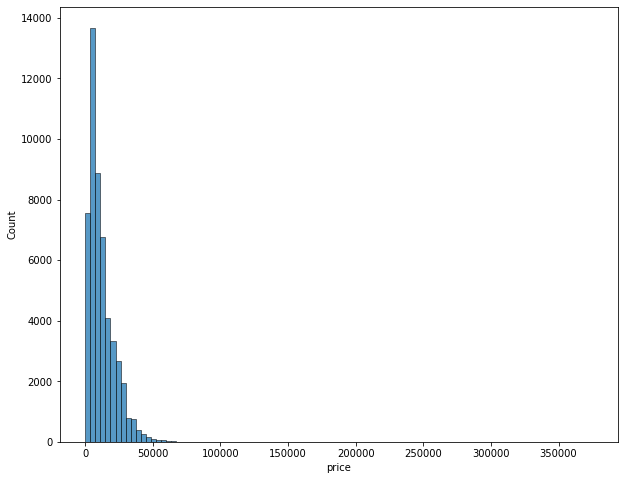

In [44]:
# primeramente vamos a observar la distribución de la variable 'price'
f,ax=plt.subplots(figsize=(10,8))
ax=sns.histplot(data_vehiculos['price'],bins=100)

Notamos que la distribución de los valores en la variable `'price'`está muy cargada hacia el cero y con pocos valores muy grandes. Habrá que revisar si hay algún problema con esos valores, valores 'outlier'. 

Recordemos que **un `'outlier'`es un valor de la muestra que pareciera no ser coherente con una mayoría de los propios datos.** Una vez que localizemos esos `'outliers'`podremos corregirlos, si determinamos que hubo error en su captura, o eliminarlos para quitar su influencia en la variable bajo estudio.

In [45]:
# generamos una lista con las variables a observar su distribución
variables=['price','years_used','mill_mean_year']

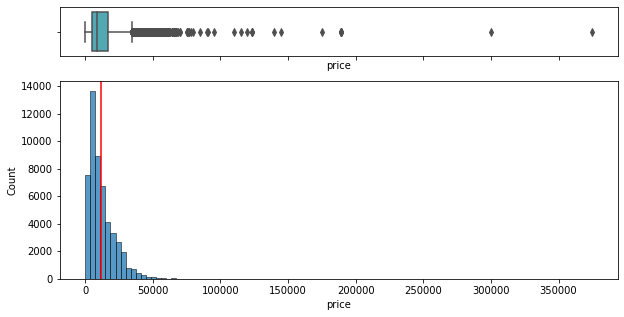

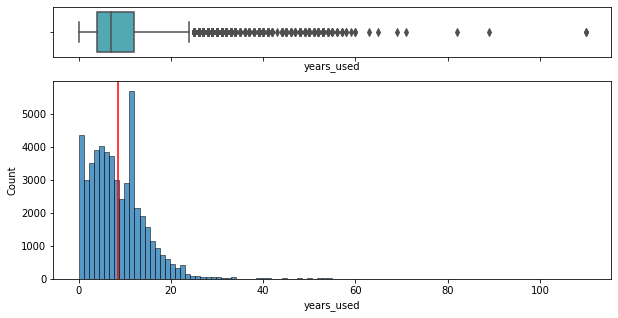

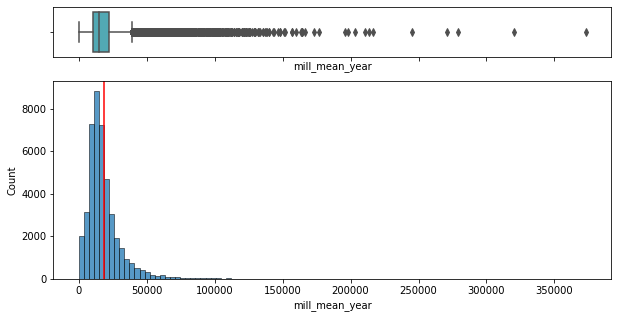

In [46]:
# creamos los gráficos 'boxplot' junto con sus histogramas para las variables mencionadas anteriormente
for var in variables:
    f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,5))

    # gráfico boxplot
    sns.boxplot(x=var,data=data_vehiculos,ax=ax[0],palette='YlGnBu_r')
    # gráfico de distribución
    sns.histplot(data_vehiculos[var],bins=100,ax=ax[1])
    # media de los datos en el histograma
    ax[1].axvline(data_vehiculos[var].mean(), color='red')

De las gráficas anteriores, podemos observar que **las variables presentan distribuciones sesgadas hacia la derecha,** la parte positiva. Vamos a proceder a estimar los rangos intercuantílicos.

Limite-inferior: -12758.50     Limite-superior: 34597.50


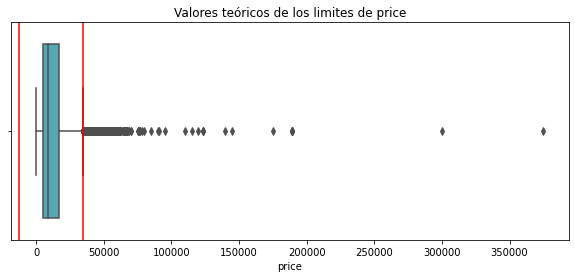

Limite-inferior: -8.00     Limite-superior: 24.00


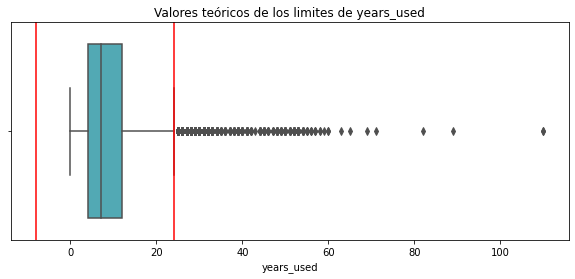

Limite-inferior: -6529.41     Limite-superior: 39117.65


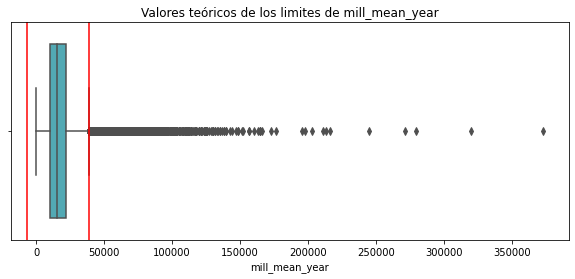

In [47]:
# creamos los gráficos 'boxplot' que incluyen los valores teóricos de los bigotes
for var in variables:
    Q1 = data_vehiculos[var].quantile(0.25)
    Q3 = data_vehiculos[var].quantile(0.75)
    
    # rango intercuantílico
    IQR=Q3-Q1
    # bigote superior Q3+1.5*IQR
    # bigote inferior Q1-1.5*IQR
    titulo=str(var)
    print(f'Limite-inferior: {Q1-1.5*IQR:.2f}     Limite-superior: {Q3+1.5*IQR:.2f}')  
    f,ax=plt.subplots(figsize=(10,4))
    fig=sns.boxplot(x=var,data=data_vehiculos,palette='YlGnBu_r')
    fig.axvline(x=Q1-1.5*IQR,color='red')
    fig.axvline(x=Q3+1.5*IQR,color='red')
    plt.title('Valores teóricos de los limites de '+titulo)
    plt.show()

En los tres gráficos, podemos observar que existen valores que podríamos considerar 'atípicos' pero más bien parecen ser una característica de los datos. Necesitamos revisar esos datos que están más allá del rango intercuantílico superior o los más cercanos a cero.

In [48]:
# revisamos los valores de 'price' mayores a 150,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['price']>=150000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
1309,189000,2014.0,ford f-150,2,6.0,gas,151248.0,automatic,truck,black,0.0,2019-03-02,56,5.0,30249.600000,5,3,2019
1668,189000,2014.0,ford f-150,2,6.0,gas,151248.0,automatic,truck,unknown,0.0,2019-03-20,21,5.0,30249.600000,2,3,2019
11359,300000,2015.0,ram 2500,3,6.0,diesel,NaN,automatic,truck,grey,1.0,2018-10-15,39,3.0,NaN,0,10,2018
12504,375000,1999.0,nissan frontier,2,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21,19.0,6052.631579,5,5,2018
27375,189000,2014.0,ford f-150,2,6.0,gas,151248.0,automatic,truck,black,0.0,2018-09-25,72,4.0,37812.000000,1,9,2018
30634,189000,2014.0,ford f-150,2,6.0,gas,NaN,automatic,truck,black,0.0,2018-07-21,42,4.0,NaN,5,7,2018
33434,189000,2014.0,ford f-150,2,6.0,gas,151248.0,automatic,truck,black,0.0,2019-02-05,102,5.0,30249.600000,1,2,2019
34206,175000,2004.0,gmc sierra 2500hd,2,8.0,diesel,149000.0,automatic,truck,grey,1.0,2018-08-25,57,14.0,10642.857143,5,8,2018
34389,189000,2014.0,ford f-150,2,6.0,gas,151248.0,automatic,truck,black,0.0,2019-02-02,28,5.0,30249.600000,5,2,2019


In [49]:
# creamos un dataframe con caracteristicas similares a cada uno de esos vehículos para hacer una comparación
data_vehiculos[(data_vehiculos['model']=='ford f-150')&(data_vehiculos['model_year']==2014)].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
139,19500,2014.0,ford f-150,3,8.0,gas,116000.0,automatic,truck,grey,1.0,2018-06-26,40,4.0,29000.0,1,6,2018
247,13499,2014.0,ford f-150,2,6.0,gas,NaN,automatic,pickup,unknown,1.0,2019-02-13,20,5.0,NaN,2,2,2019
299,18488,2014.0,ford f-150,2,8.0,gas,104906.0,automatic,truck,blue,0.0,2019-02-12,17,5.0,20981.2,1,2,2019
390,19500,2014.0,ford f-150,3,6.0,gas,95000.0,automatic,truck,blue,1.0,2018-09-06,84,4.0,23750.0,3,9,2018
631,22500,2014.0,ford f-150,3,6.0,gas,95382.0,automatic,pickup,grey,1.0,2019-02-22,33,5.0,19076.4,4,2,2019


De la tabla anterior, notamos que para los modelos 'ford f-150' y año '2014' el precio ronda las cinco cifras, así que asumiremos que hubo un error de captura en el precio y procederemos a cambiar el valor de 189000 por 18900.

In [50]:
# cambiamos el precio de los modelos 'ford f-150' y precio igual a 189,000 por 18,900
data_vehiculos.loc[(data_vehiculos['model']=='ford f-150')&(data_vehiculos['price']==189000),'price']=18900

In [51]:
# revisamos los valores de 'price' mayores a 150,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['price']>=150000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
11359,300000,2015.0,ram 2500,3,6.0,diesel,NaN,automatic,truck,grey,1.0,2018-10-15,39,3.0,NaN,0,10,2018
12504,375000,1999.0,nissan frontier,2,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21,19.0,6052.631579,5,5,2018
34206,175000,2004.0,gmc sierra 2500hd,2,8.0,diesel,149000.0,automatic,truck,grey,1.0,2018-08-25,57,14.0,10642.857143,5,8,2018


In [52]:
# creamos un dataframe con caracteristicas similares a cada uno de esos vehículos para hacer una comparación
data_vehiculos[(data_vehiculos['model']=='ram 2500')&(data_vehiculos['model_year']==2015)].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
286,35999,2015.0,ram 2500,2,6.0,diesel,157558.0,automatic,truck,grey,1.0,2018-12-13,59,3.0,52519.333333,3,12,2018
461,27000,2015.0,ram 2500,3,8.0,gas,62500.0,automatic,truck,blue,1.0,2019-04-03,120,4.0,15625.000000,2,4,2019
708,25400,2015.0,ram 2500,3,8.0,diesel,178285.0,automatic,truck,white,0.0,2018-11-24,13,3.0,59428.333333,5,11,2018
2002,36995,2015.0,ram 2500,2,8.0,diesel,52699.0,automatic,truck,grey,1.0,2018-05-21,29,3.0,17566.333333,0,5,2018
2469,31500,2015.0,ram 2500,2,8.0,gas,145838.0,automatic,truck,unknown,1.0,2019-03-28,90,4.0,36459.500000,3,3,2019


In [53]:
# cambiamos el precio de los modelos 'ram 2500' y precio igual a 300,000 por 30,000
data_vehiculos.loc[(data_vehiculos['model']=='ram 2500')&(data_vehiculos['price']==300000),'price']=30000

In [54]:
# revisamos los valores de 'price' mayores a 150,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['price']>=150000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
12504,375000,1999.0,nissan frontier,2,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21,19.0,6052.631579,5,5,2018
34206,175000,2004.0,gmc sierra 2500hd,2,8.0,diesel,149000.0,automatic,truck,grey,1.0,2018-08-25,57,14.0,10642.857143,5,8,2018


In [55]:
# creamos un dataframe con caracteristicas similares a cada uno de esos vehículos para hacer una comparación
data_vehiculos[(data_vehiculos['model']=='nissan frontier')&(data_vehiculos['model_year']==1999)].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
12504,375000,1999.0,nissan frontier,2,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21,19.0,6052.631579,5,5,2018
25872,3900,1999.0,nissan frontier,2,6.0,gas,136500.0,automatic,truck,unknown,1.0,2018-08-30,57,19.0,7184.210526,3,8,2018
38175,1800,1999.0,nissan frontier,2,6.0,gas,228000.0,manual,pickup,black,0.0,2019-02-02,11,20.0,11400.000000,5,2,2019


De la tabla anterior, notamos que para los modelos 'nissan frontier' y año '1999' el precio ronda las cuatro cifras, así que asumiremos que hubo un error de captura en el precio y procederemos a cambiar el valor de 375000 por 3750.

In [56]:
# cambiamos el precio de los modelos 'nissan frontier' y precio igual a 375,000 por 3,750
data_vehiculos.loc[(data_vehiculos['model']=='nissan frontier')&(data_vehiculos['price']==375000),'price']=3750

In [57]:
# revisamos los valores de 'price' mayores a 150,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['price']>=150000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
34206,175000,2004.0,gmc sierra 2500hd,2,8.0,diesel,149000.0,automatic,truck,grey,1.0,2018-08-25,57,14.0,10642.857143,5,8,2018


In [58]:
# creamos un dataframe con caracteristicas similares a cada uno de esos vehículos para hacer una comparación
data_vehiculos[(data_vehiculos['model']=='gmc sierra 2500hd')&(data_vehiculos['model_year']==2004)].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
445,13500,2004.0,gmc sierra 2500hd,3,8.0,gas,177000.0,automatic,truck,grey,1.0,2018-10-09,37,14.0,12642.857143,1,10,2018
1922,18000,2004.0,gmc sierra 2500hd,3,8.0,diesel,NaN,automatic,truck,black,1.0,2018-10-04,33,14.0,NaN,3,10,2018
2386,7000,2004.0,gmc sierra 2500hd,2,8.0,gas,212000.0,automatic,pickup,white,1.0,2018-08-05,15,14.0,15142.857143,6,8,2018
3898,12900,2004.0,gmc sierra 2500hd,3,8.0,diesel,210763.0,automatic,truck,white,0.0,2018-07-01,61,14.0,15054.500000,6,7,2018
3943,6500,2004.0,gmc sierra 2500hd,2,8.0,diesel,190653.0,automatic,truck,white,1.0,2018-05-08,19,14.0,13618.071429,1,5,2018


De la tabla anterior, notamos que para los modelos 'gmc sierra 2500hd' y año '2004' el precio ronda los 13000, así que asumiremos que hubo un error de captura en el precio y procederemos a cambiar el valor de 175000 por 17500.

In [59]:
# cambiamos el precio de los modelos 'gmc sierra 2500hd' y precio igual a 175,000 por 17,500
data_vehiculos.loc[(data_vehiculos['model']=='gmc sierra 2500hd')&(data_vehiculos['price']==175000),'price']=17500

In [60]:
# revisamos los valores de 'price' mayores a 150,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['price']>=150000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year


In [61]:
# revisamos los valores de 'years_used' mayores a 60 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['years_used']>=60]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
10018,23900,1955.0,ford f-250,3,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61,63.0,748.888889,5,12,2018
14752,15000,1954.0,ford f-150,3,8.0,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13,65.0,54.846154,5,2,2019
22595,21000,1948.0,chevrolet impala,4,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24,71.0,56.338028,4,1,2019
33906,12995,1908.0,gmc yukon,2,8.0,gas,169328.0,automatic,suv,black,0.0,2018-07-06,34,110.0,1539.345455,4,7,2018
33907,12995,1908.0,cadillac escalade,3,8.0,gas,NaN,automatic,suv,white,0.0,2018-06-24,25,110.0,NaN,6,6,2018
34713,5000,1936.0,ford f-150,3,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10,82.0,365.853659,3,11,2018
36582,44900,1949.0,chevrolet suburban,2,8.0,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10,69.0,26.086957,6,8,2018
39580,35000,1958.0,chevrolet impala,3,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33,60.0,53.066667,5,5,2018
45694,18000,1929.0,ford f-150,2,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,89.0,NaN,6,11,2018
48414,37900,1958.0,chevrolet impala,2,8.0,gas,62799.0,automatic,coupe,unknown,0.0,2018-08-11,10,60.0,1046.650000,5,8,2018


La tabla anterior nos revela que **se han vendido modelos antiguos de autos y que mucha gente considera como clásicos.** Aunque hay también otros modelos que parece haber error en la captura  en el año del modelo, un **outlier.**

In [62]:
# revisamos los valores de 'mill_mean_year' mayores a 170,000 y buscamos las características de esos vehiculos
data_vehiculos[data_vehiculos['mill_mean_year']>=170000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
1195,2750,2017.0,nissan sentra,2,4.0,gas,172991.0,manual,sedan,blue,0.0,2018-05-23,31,1.0,172991.000000,2,5,2018
2840,18500,2014.0,ford explorer,3,6.0,gas,866000.0,automatic,suv,black,1.0,2018-07-20,14,4.0,216500.000000,4,7,2018
4970,29000,2018.0,chevrolet silverado 1500,3,8.0,gas,373200.0,automatic,truck,unknown,1.0,2018-09-14,40,0.0,373200.000000,4,9,2018
5735,7500,2015.0,hyundai elantra,3,4.0,gas,813542.0,other,coupe,brown,0.0,2018-11-21,5,3.0,271180.666667,2,11,2018
9742,12500,2018.0,nissan altima,4,4.0,gas,320000.0,automatic,sedan,silver,0.0,2018-08-14,75,0.0,320000.000000,1,8,2018
13027,8500,2015.0,chevrolet malibu,3,4.0,gas,838095.0,automatic,sedan,silver,0.0,2018-05-30,10,3.0,279365.000000,2,5,2018
18136,2500,2017.0,hyundai elantra,2,4.0,gas,211000.0,automatic,sedan,blue,0.0,2018-12-29,66,1.0,211000.000000,5,12,2018
33578,12995,2014.0,chrysler 300,4,6.0,gas,811956.0,automatic,sedan,unknown,0.0,2018-11-13,44,4.0,202989.000000,1,11,2018
36412,9000,2018.0,chevrolet equinox,3,4.0,gas,195700.0,automatic,suv,unknown,1.0,2018-05-16,31,0.0,195700.000000,2,5,2018
38788,3999,2017.0,hyundai elantra,2,4.0,gas,176700.0,automatic,hatchback,silver,0.0,2018-11-21,18,1.0,176700.000000,2,11,2018


La tabla anterior nos revela que hay vehículos que tienen un alto kilometraje reportado en pocos años de uso, lo cual pueda deberse a un error en la captura del kilometraje o bien a que efectivamente han tenido mucho uso.

Hemos corregido los valores que parecían no coincidir con la mayoría de los demás valores en la variable `'price'`. Veamos nuevamente el gráfico `'boxplot'` para esta variable.

Limite-inferior: -12752.50     Limite-superior: 34587.50


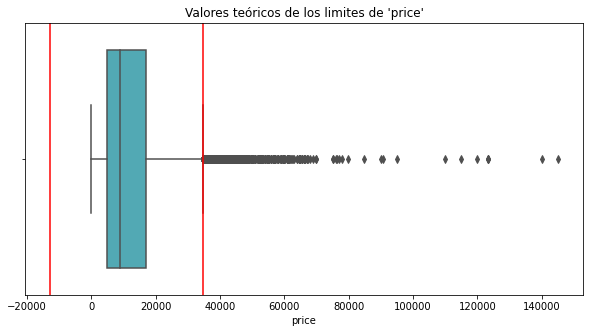

In [63]:
Q1 = data_vehiculos['price'].quantile(0.25)
Q3 = data_vehiculos['price'].quantile(0.75)
    
# rango intercuantílico
IQR=Q3-Q1
# bigote superior Q3+1.5*IQR
# bigote inferior Q1-1.5*IQR
print(f'Limite-inferior: {Q1-1.5*IQR:.2f}     Limite-superior: {Q3+1.5*IQR:.2f}')   
f,ax=plt.subplots(figsize=(10,5))
fig=sns.boxplot(x='price',data=data_vehiculos,palette='YlGnBu_r')
fig.axvline(x=Q1-1.5*IQR,color='red')
fig.axvline(x=Q3+1.5*IQR,color='red')
plt.title("Valores teóricos de los limites de 'price'")
plt.show()

Parece que aún hay valores atípicos con respecto a la variable `'price'`, enseguida vamos a proceder a trabajar con los rangos intercuantílicos.

[Volver a Contenidos](#inicio) <a id='analysis_outliers'></a>
### Estudiar y tratar valores atípicos  
Los valores que se consideran atípicos se encuentran fuera del intervalo [Q1-1.5 \* *IQR*, Q3+1.5 \* *IQR* ]. Q1 es el primer cuartil, Q3 es el tercer cuartil e *IQR* es el rango intercuantílico (Q3-Q1).  
Vamos a buscar valores atípicos en las columnas `'price'`, `'years_used'` y `'mill_mean_year'`.

In [64]:
# buscamos los límites inferior y superior [Q1-1.5*IQR, Q3+1.5*IQR]
# generamos una lista con las variables a observar su distribución
variables=['price','years_used','mill_mean_year']

# diccionario para almacenar los limites inferiores y superiores
limites={'variable':[],'limite_inferior':[],'limite_superior':[]}
for var in variables:
    Q1 = data_vehiculos[var].quantile(0.25)
    Q3 = data_vehiculos[var].quantile(0.75)
    
    # rango intercuantílico
    IQR=Q3-Q1
    limite_inferior=Q1-1.5*IQR
    limite_superior=Q3+1.5*IQR
    limites['variable'].append(var)
    limites['limite_inferior'].append(limite_inferior)
    limites['limite_superior'].append(limite_superior)

In [65]:
# Veamos que se hayan almacenado los limites
limites

{'variable': ['price', 'years_used', 'mill_mean_year'],
 'limite_inferior': [-12752.5, -8.0, -6529.411764705885],
 'limite_superior': [34587.5, 24.0, 39117.64705882353]}

In [66]:
# vamos a crear ahora un DataFrame que no incluya los valores atípicos

# creamos un DataFrame sin valores atípicos en 'price'
lim_inf=limites['limite_inferior'][0]
lim_sup=limites['limite_superior'][0]
data_vehiculos_not_outliers=data_vehiculos.query('@lim_inf<=price<=@lim_sup')

In [67]:
# creamos un DataFrame sin valores atípicos en 'years_used'
lim_inf=limites['limite_inferior'][1]
lim_sup=limites['limite_superior'][1]
data_vehiculos_not_outliers=data_vehiculos_not_outliers.query('@lim_inf<=years_used<=@lim_sup')

In [68]:
# creamos un DataFrame sin valores atípicos en 'mill_mean_years'
lim_inf=limites['limite_inferior'][2]
lim_sup=limites['limite_superior'][2]
data_vehiculos_not_outliers=data_vehiculos_not_outliers.query('@lim_inf<=mill_mean_year<=@lim_sup')
data_vehiculos_not_outliers.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,years_used,mill_mean_year,day_week,month,year
count,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000,39128.000000
mean,10869.737400,2009.661623,2.618432,6.071790,117761.935059,0.485790,39.610560,8.655234,15853.449443,3.002045,6.571049,2018.316857
std,7707.638706,5.054592,0.703986,1.648808,62696.065359,0.499804,28.139366,5.055940,7812.239357,1.995483,3.483057,0.465257
min,1.000000,1994.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,4995.000000,2006.000000,2.000000,4.000000,74049.250000,0.000000,19.000000,5.000000,10526.308271,1.000000,3.000000,2018.000000
50%,8695.000000,2010.000000,3.000000,6.000000,115937.500000,0.000000,33.000000,8.000000,14676.697917,3.000000,7.000000,2018.000000
75%,15000.000000,2014.000000,3.000000,8.000000,156948.500000,1.000000,53.000000,12.000000,20206.727273,5.000000,10.000000,2019.000000
max,34555.000000,2019.000000,5.000000,12.000000,710000.000000,1.000000,271.000000,24.000000,39116.666667,6.000000,12.000000,2019.000000


In [69]:
limites

{'variable': ['price', 'years_used', 'mill_mean_year'],
 'limite_inferior': [-12752.5, -8.0, -6529.411764705885],
 'limite_superior': [34587.5, 24.0, 39117.64705882353]}

Podemos notar que este último conjunto de datos `'data_vehiculos_not_outliers'` cumple ya con las condiciones para no contener `'outliers'`en las variables `'price'`, `'years_used'` y `'mill_mean_year'` simultáneamente.

[Volver a Contenidos](#inicio)  <a id='analysis_without_ouliers'></a>
### Estudiar parámetros principales sin valores atípicos

Comparemos ahora las **distribuciones** para los datos **con `outliers` y sin `outliers`.**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


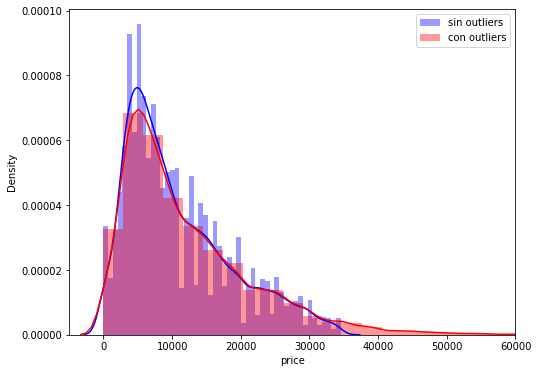

In [70]:
# primeramente vamos a observar la distribución de la variable 'price'
f,ax=plt.subplots(figsize=(8,6))

# histograma sin 'outliers'
fig=sns.distplot(data_vehiculos_not_outliers['price'],color='blue',label='sin outliers')
plt.legend(loc='best')

# histograma con 'outliers'
fig2=sns.distplot(data_vehiculos['price'],color='red',label='con outliers')
plt.xlim(-5000,60000)
plt.legend(loc='best')
plt.show()

**Podemos observar que la variable `'price'` sigue teniendo una distribución similar en los dos conjuntos de datos creados, sin outliers y con outliers.** Hay una gran cantidad de vehiculos con precio entre 8000 y 9000. Existen también vehículos con precios muy cercanos a cero, quizás alguna mala captura o vehículos de salvamento.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


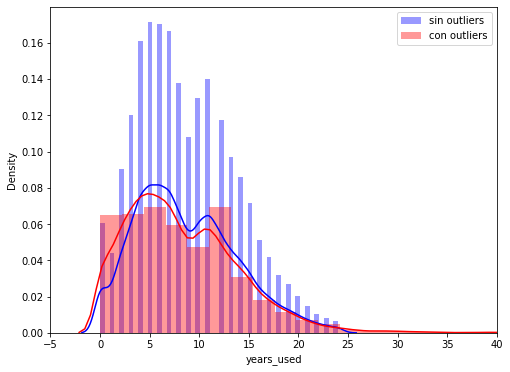

In [71]:
# observemos la distribución de la variable 'years_used'
f,ax=plt.subplots(figsize=(8,6))

# histograma sin 'outliers'
fig=sns.distplot(data_vehiculos_not_outliers['years_used'],color='blue',label='sin outliers')
plt.legend(loc='best')

# histograma con 'outliers'
fig2=sns.distplot(data_vehiculos['years_used'],color='red',label='con outliers')
plt.xlim(-5,40)
plt.legend(loc='best')
plt.show()

**Podemos observar que la variable `'years_used'` sigue teniendo una distribución similar en los dos conjuntos de datos creados, sin outliers y con outliers.** Hay una gran cantidad de vehiculos con años de uso entre 5 y 6 años. También tenemos otro pico de valores en los 11 años.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


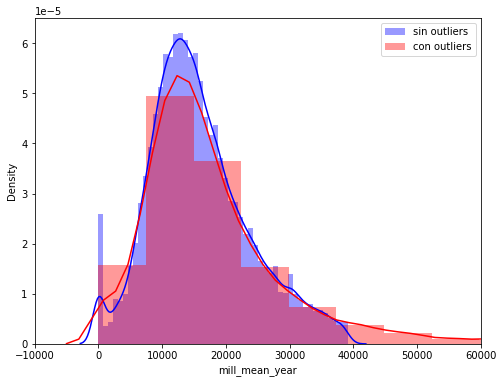

In [72]:
# observemos ahora la distribución de la variable 'mill_mean_year'
f,ax=plt.subplots(figsize=(8,6))

# histograma sin 'outliers'
fig=sns.distplot(data_vehiculos_not_outliers['mill_mean_year'],color='blue',label='sin outliers')
plt.legend(loc='best')

# histograma con 'outliers'
fig2=sns.distplot(data_vehiculos['mill_mean_year'],color='red',label='con outliers')
plt.xlim(-10000,60000)
plt.legend(loc='best')
plt.show()

**Podemos observar que la variable `'mill_mean_year'` sigue teniendo una distribución similar en los dos conjuntos de datos creados, sin outliers y con outliers.** En el conjunto de datos sin outliers tenemos un pico pequeño cercano al cero, lo que nos puede indicar que se están ofertando vehículos con poco kilometraje, posiblemente nuevos o seminuevos.

[Volver a Contenidos](#inicio) <a id='analysis_announcements'></a>
### Periodo de colocación de los anuncios    
Vamos a estudiar ahora la cantidad de días que los anuncios fueron mostrados. Trataremos de determinar que variable influye en la cantidad de días que el anuncio fue mostrado.

In [73]:
# obtenemos la media de 'days_listed'
media_listed=data_vehiculos_not_outliers['days_listed'].mean()

#obtenemos la mediana de 'days_listed'
mediana_listed=data_vehiculos_not_outliers['days_listed'].median()
print(f'Promedio que dura exhibido un anuncio es:{media_listed:.2f}    La mediana es:{mediana_listed:.2f}')

Promedio que dura exhibido un anuncio es:39.61    La mediana es:33.00


In [74]:
data_vehiculos_not_outliers.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,unknown,1.0,2018-06-23,19,7.0,20714.285714,5,6,2018


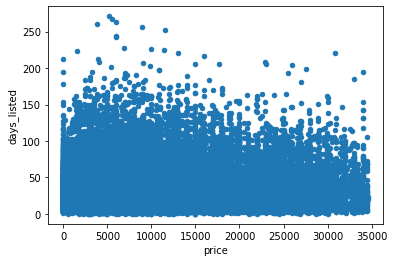

In [75]:
# veamos el comportamiento de 'days_listed' respecto a 'price'
data_vehiculos_not_outliers.plot(x='price',y='days_listed',kind='scatter')
plt.show()

La gráfica anterior nos sugiere que no parece haber relación entre el precio y los días que dura un anuncio publicado.

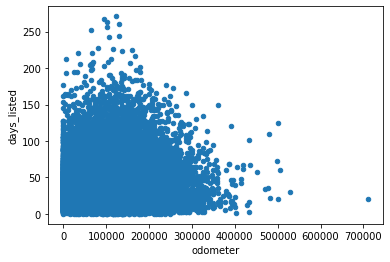

In [76]:
# veamos el comportamiento de 'days_listed' respecto a 'odometer'
data_vehiculos_not_outliers.plot(x='odometer',y='days_listed',kind='scatter')
plt.show()

La gráfica anterior nos sugiere que no parece haber relación entre el kilometraje y los días que dura un anuncio publicado. A continuación vamos a estudiar el tiempo que dura exhibido un anuncio de venta.

In [77]:
# buscamos los percentiles en 'days_listed' para decidir el tiempo de duración de un anuncio
P_05 = data_vehiculos_not_outliers['days_listed'].quantile(0.05) # poca duración
P_95= data_vehiculos_not_outliers['days_listed'].quantile(0.95)  # mucha duración
print(f'Pocos días: {P_05} \t Demasiados días: {P_95}')
print()
# con estos valores vamos a crear dos columnas que nos digan si un anuncio duró poco o mucho tiempo exhibido
data_vehiculos_not_outliers['few_days']=data_vehiculos_not_outliers['days_listed']<=P_05
data_vehiculos_not_outliers['too_days']=data_vehiculos_not_outliers['days_listed']>=P_95
data_vehiculos_not_outliers[data_vehiculos_not_outliers['few_days']].head()

Pocos días: 7.0 	 Demasiados días: 93.0



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_used,mill_mean_year,day_week,month,year,few_days,too_days
32,9499,2015.0,nissan altima,4,4.0,gas,51848.0,automatic,sedan,grey,0.0,2018-11-12,7,3.0,17282.666667,0,11,2018,True,False
39,8000,2009.0,ford f-150,2,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,10.0,23400.000000,6,3,2019,True,False
59,5200,2006.0,toyota highlander,2,6.0,gas,186000.0,automatic,suv,green,0.0,2018-12-20,2,12.0,15500.000000,3,12,2018,True,False
75,6950,2005.0,chevrolet tahoe,3,8.0,gas,186021.0,automatic,suv,unknown,1.0,2018-10-30,3,13.0,14309.307692,1,10,2018,True,False
120,33900,2018.0,chevrolet silverado 1500 crew,2,8.0,gas,11315.0,other,pickup,white,1.0,2019-03-01,2,1.0,11315.000000,4,3,2019,True,False


In [78]:
# creamos ahora una pivot_table que nos muestre el porcentaje de la duración de un anuncio agrupando por 'fuel'
tabla_f=data_vehiculos_not_outliers.pivot_table(index='fuel',
        values=['days_listed','few_days','too_days']).style.format({'days_listed':'{:.0f}','few_days':'{:.1%}','too_days':'{:.1%}'}).highlight_max()
tabla_f

,days_listed,few_days,too_days
fuel,,,
diesel,39,6.0%,4.9%
electric,45,0.0%,0.0%
gas,40,6.0%,5.2%
hybrid,37,9.6%,5.4%
other,37,7.5%,3.8%


La tabla anterior nos muestra que de los anuncios totales, casi un 10% de los anuncios duran menos de siete días y casi 6% duran más de noventa y tres días, para los vehículos híbridos. No hay anuncios para los vehículos eléctricos que duren menos de siete días ó más de noventa y tres días. En promedio, los anuncios para los vehículos eléctricos duran 45 días exhibidos.

In [79]:
# creamos ahora una pivot_table que nos muestre el porcentaje de la duración de un anuncio agrupando por 'cylinders'
tabla_c=data_vehiculos_not_outliers.pivot_table(index='cylinders',
        values=['days_listed','few_days','too_days']).style.format({'days_listed':'{:.0f}','few_days':'{:.1%}','too_days':'{:.1%}'}).highlight_max()
tabla_c

,days_listed,few_days,too_days
cylinders,,,
3.0,45,3.7%,11.1%
4.0,40,6.1%,5.2%
5.0,39,5.7%,5.3%
6.0,39,6.0%,5.0%
8.0,40,6.1%,5.4%
10.0,41,6.0%,4.9%
12.0,22,0.0%,0.0%


De la tabla anterior podemos observar que de los anuncios totales, poco más del 11% de los anuncios duran más de noventa y siete días, para los vehículos con tres cilindros. Mientras que para vehículos con cilindraje de cuatro, cinco, seis, ocho y diez, casi un 6% de los anuncios duran menos de siete días. Para los vehículos de tres cilindros, el promedio que dura exhibido un anuncio es de 45 días.

In [80]:
# creamos ahora una pivot_table que nos muestre el porcentaje de la duración de un anuncio agrupando por 'condition'
tabla_cond=data_vehiculos_not_outliers.pivot_table(index='condition',
        values=['days_listed','few_days','too_days']).style.format({'days_listed':'{:.0f}','few_days':'{:.1%}','too_days':'{:.1%}'}).highlight_max()
tabla_cond

,days_listed,few_days,too_days
condition,,,
0,41,5.6%,7.9%
1,39,6.0%,5.0%
2,40,6.0%,5.1%
3,40,5.9%,5.3%
4,39,7.4%,5.0%
5,37,6.5%,3.9%


De la tabla anterior observamos que de los anuncios totales, hay un poco más del 6% de anuncios que duran menos de siete días para los vehículos nuevos (condition=5) y, un poco más del 7% de anuncios que duran menos de siete días para los vehículos semi-nuevos (condition=4). Para los vehículos de salvamento (condition=0), hay casi un 8% de anuncios que duran más de noventa y siete días. Para los vehículos nuevos, el promedio que dura un anuncio exhibido es de 37 días.

[Volver a Contenidos](#inicio) <a id='analysis_vehicle'></a>
### Precio promedio por cada tipo de vehículo

Analicemos ahora el número de anuncios y el precio promedio para cada tipo de vehículo. Trataremos de identificar aquellos tipos de vehículos con el mayor número de anuncios.

In [81]:
# creamos una pivot_table que nos muestre el número de anuncios y el precio promedio por tipo de vehículo
tabla_type=data_vehiculos_not_outliers.pivot_table(index='type',values='price',aggfunc=['mean','count'])\
    .sort_values(('count','price'),ascending=False)\
    .style.format({('mean','price'):'{:.2f}',('count','price'):'{:.0f}'})\
    .highlight_max()

tabla_type

,mean,count
,price,price
type,,
suv,10193.55,9669
sedan,6740.91,9611
truck,14546.29,8938
pickup,14512.79,5110
coupe,13209.99,1698
wagon,8615.55,1251
mini-van,7758.44,905
hatchback,6578.48,833


La tabla anterior nos muestra que **los tipos `'suv'`y `'sedan'` son los tipos de vehículos que más anuncios de venta tienen, con 9669 y 9611,** respectivamente. Mientras que el tipo `'bus'` muestra el precio promedio más alto, seguido de `'truck'` y `'pickup'`.

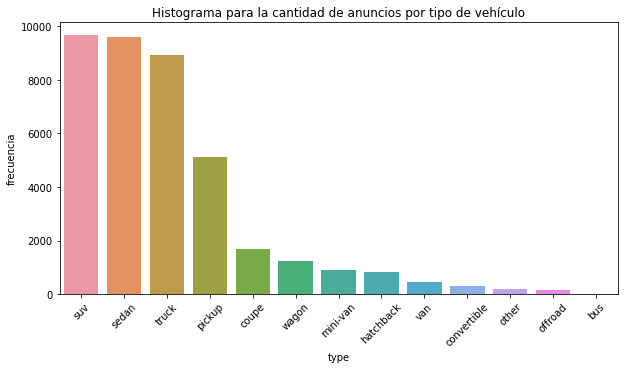

In [82]:
# histograma para la cantidad de anuncios por tipo de vehículo
tabla_type=data_vehiculos_not_outliers.pivot_table(index='type',values='price',aggfunc=['mean','count'])\
    .sort_values(('count','price'),ascending=False)
plt.subplots(figsize=(10,5))
sns.barplot(x=tabla_type.index,y = tabla_type[('count','price')])
plt.xticks(rotation=45)
plt.ylabel('frecuencia')
plt.title('Histograma para la cantidad de anuncios por tipo de vehículo')
plt.show()

[Volver a Contenidos](#inicio) <a id='analysis_price'></a>
### Factores de precio

In [83]:
# veamos el tamaño del set de datos hasta este punto
data_vehiculos_not_outliers.shape

(39128, 20)

**Para estudiar que variables pueden impactar en el precio de un vehículo vamos a crear una matriz de correlación.** Primero vamos a crear un DataFrame que contenga las variables `'price'`, `'years_used'`, `'condition'` y `'odometer'`. Para ello vamos a filtrar el set de datos para los tipos de vehículos: `suv` y `sedan`, por ser los tipos de vehículos que más se ofertan.

In [84]:
# creamos el dataframe con las variables mencionadas
tipos=['suv','sedan']
data_vehiculos_not_outliers=data_vehiculos_not_outliers.query('type in @tipos')
data_vehiculos_corr=pd.concat([data_vehiculos_not_outliers['price'],
    data_vehiculos_not_outliers['years_used'],
    data_vehiculos_not_outliers['odometer'],
    data_vehiculos_not_outliers['condition']],axis=1)
data_vehiculos_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19280 entries, 0 to 51523
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       19280 non-null  int64  
 1   years_used  19280 non-null  float64
 2   odometer    19280 non-null  float64
 3   condition   19280 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 753.1 KB


In [85]:
# obtenemos la matriz de correlaciones aplicando el método corr() al dataframe
matriz_corr=data_vehiculos_corr.corr()

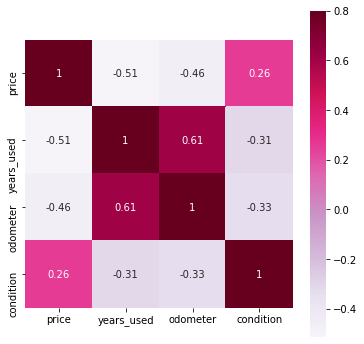

In [86]:
# creamos un 'heatmap' de las correlaciones
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(matriz_corr,vmax=0.8,annot=True,cmap='PuRd',square=True)
plt.show()

En el 'heatmap' anterior podemos observar que el precio tiene relación lineal negativa con los años de uso y el kilometraje del vehículo, es decir; el precio disminuirá a medida que incrementen los años de uso y el kilometraje. A su vez, los años de uso y el kilometraje están relacionados positivamente, si los años de uso aumentan también lo hará el kilometraje. La condición no parece tener tanta influencia en el precio, su correlación es apenas del 0.26.

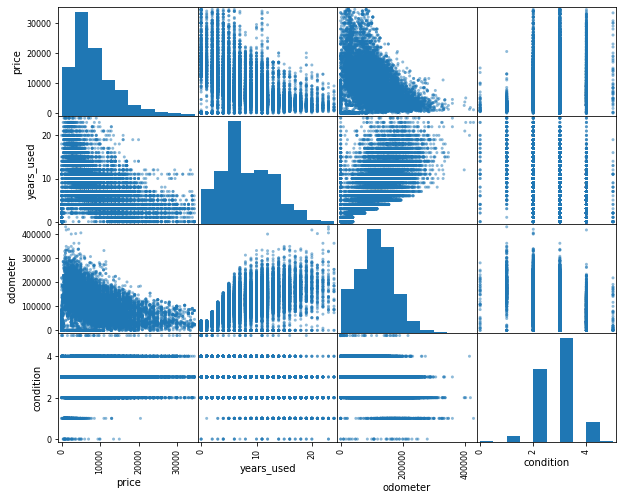

In [87]:
# creamos una matriz de gráficas para 'price' y las variables mencionadas
pd.plotting.scatter_matrix(data_vehiculos_corr,figsize=(10,8))
plt.show()

A continuación vamos a estudiar la relación entre la variable `'price'` con las variables `'transmission`', `'condition'` y `'paint_color'`. Usaremos para ello gráficas de caja.

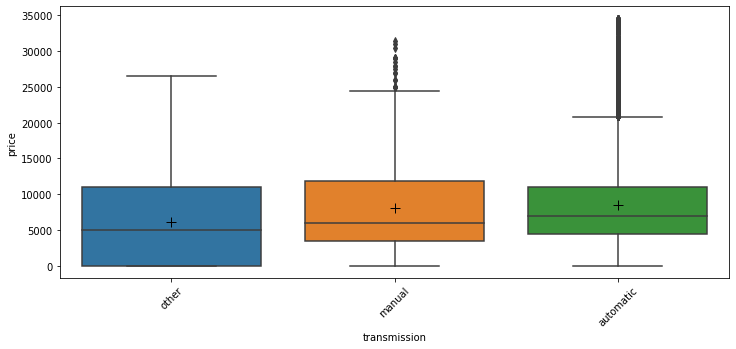

In [88]:
# creamos un dataframe agrupado por 'transmission' y ordenado en forma ascendente por sus valores medianos
grouped = data_vehiculos_not_outliers.loc[:,['transmission', 'price']] \
    .groupby(['transmission']) \
    .median() \
    .sort_values(by='price')

# creamos una gráfica boxplot para 'price' y 'transmission'
f,ax=plt.subplots(figsize=(12,5))
sns.boxplot(x=data_vehiculos_not_outliers.transmission, y=data_vehiculos_not_outliers.price,
            showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"},
            order=grouped.index)
plt.xticks(rotation=45)
plt.show()

El precio parece incrementar cuando el tipo de transmisión es `'automatic'`, ya que la mediana es ligeramente mayor a los otros tipos de transmisión; sin embargo, el precio parece estar más concentrado cerca del promedio y tener menos dispersión a comparación de los otros tipos de transmisión.

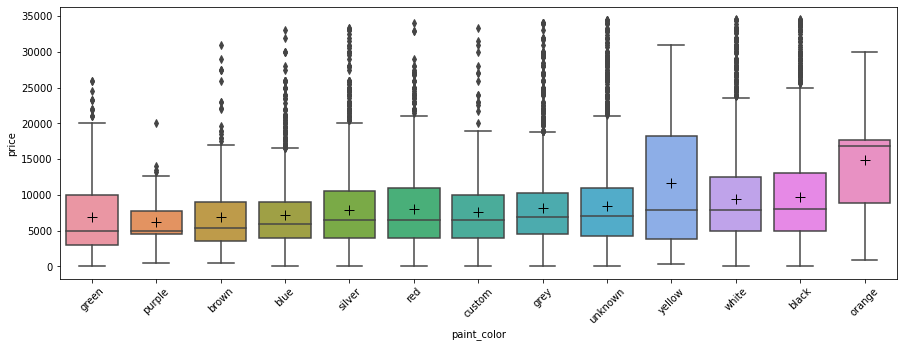

In [89]:
# creamos un dataframe agrupado por 'paint_color' y ordenado en forma ascendente por sus valores medianos
grouped = data_vehiculos_not_outliers.loc[:,['paint_color', 'price']] \
    .groupby(['paint_color']) \
    .median() \
    .sort_values(by='price')

# creamos una gráfica boxplot para 'price' y 'paint_color'
f,ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=data_vehiculos_not_outliers.paint_color, y=data_vehiculos_not_outliers.price,
            showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"},
            order=grouped.index)
plt.xticks(rotation=45)
plt.show()

En la gráfica anterior, podemos observar que los vehículos de color `yellow` son los que presentan una mayor variación en cuanto al precio, contrario a los vehículos de color `purple`.

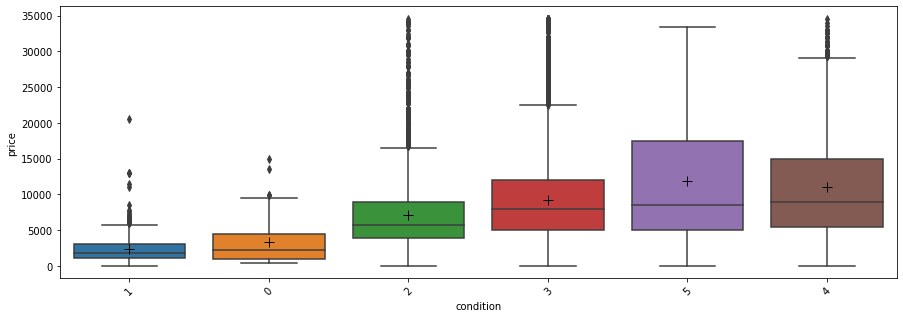

In [90]:
# creamos un dataframe agrupado por 'condition' y ordenado en forma ascendente por sus valores medianos
grouped = data_vehiculos_not_outliers.loc[:,['condition', 'price']] \
    .groupby(['condition']) \
    .median() \
    .sort_values(by='price')

# creamos una gráfica boxplot para 'price' y 'paint_color'
f,ax=plt.subplots(figsize=(15,5))
sns.boxplot(x=data_vehiculos_not_outliers.condition, y=data_vehiculos_not_outliers.price,
            showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"},
            order=grouped.index)
plt.xticks(rotation=45)
plt.show()

Podemos observar en el gráfico anterior que los vehículos `semi-nuevos` y `nuevos` tienen la mayor variación en cuanto al precio, contrario a los vehículos `de salvamento` y `justos`. Para los vehículos `nuevos`, `semi-nuevos`, `excelentes` y `en buenas condiciones` el precio promedio es mayor que para los vehículos de `salvamento` y `justos`.

Vamos ahora a crear un histograma para los días que dura publicado un anuncio.

La media de days_listed es:39.63


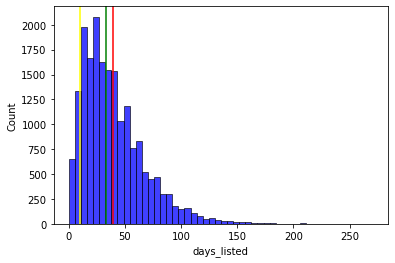

In [91]:
# histograma para 'days_listed'
print(f"La media de days_listed es:{data_vehiculos_not_outliers['days_listed'].mean():.2f}")
fig=sns.histplot(data_vehiculos_not_outliers['days_listed'],bins=50,color='blue')
# trazamos una linea en la media de los datos
fig.axvline(data_vehiculos_not_outliers['days_listed'].mean(), color='red')
# trazamos una linea en la mediana de los datos
fig.axvline(data_vehiculos_not_outliers['days_listed'].median(), color='green')
# trazamos una linea en 10 días
fig.axvline(10, color='yellow')
plt.show()

In [92]:
# obtengamos el porcentaje de anuncios con dias entre 10 y 40
N=len(data_vehiculos_not_outliers)
n=len(data_vehiculos_not_outliers.query('10<=days_listed<=40'))
print(f'El tamaño total de los datos es: {N}')
print(f'El tamaño total de los datos con días entre 10 y 40 es: {n}')
print(f'El porcentaje es: {n/N:.0%}')

El tamaño total de los datos es: 19280
El tamaño total de los datos con días entre 10 y 40 es: 9997
El porcentaje es: 52%


Podemos observar que hay una gran cantidad de anuncios que duran publicados entre diez y cuarenta días.

[Volver a Contenidos](#inicio) <a id='conclusion_gral'></a>
## Conclusión general

Del análisis anterior podemos concluir:  
- Las variables del set de datos presentaron diversos problemas como datos ausentes y tipos de datos que no eran propicios para realizar el estudio.
- En algunas variables se pudo reemplazar los valores ausentes usando combinaciones de otras variables para estimar algún valor que resultara coherente como valor de reemplazo. En otras, como `'odometer'`, está no fue la opción más recomendable.
- En algunas otras variables fue necesario hacer un cambio en el tipo de datos, ya fuera para poder obtener otras columnas como el año, mes o día de la semana. En algunas variables categóricas esto fue necesario para poder crear una matriz de correlaciones.
- En el caso de los datos outliers, es necesario revisar aquellos datos outliers para poder ver hacer las correcciones en aquellos casos donde los valores tienen problemas por una mala captura o descartar que efectivamente sea un dato válido aunque no muy usual. Entre estos podríamos considerar a los autos que pudieran considerarse como antiguos y que tengan muchos años de uso.
- Los vehículos de tipo `suv` y `sedan` son de los que más se anuncian para venta.
- El precio tiene relación lineal negativa con los años de uso y el kilometraje del vehículo, el precio disminuirá a medida que incrementen los años de uso y el kilometraje. La condición no parece tener mucha relación con el precio del vehículo.
- El rango de precio en los vehículos automáticos es mucho menor que los vehículos con otro tipo de transmisión.
- Los vehículos `nuevos` y `seminuevos` tienen un mayor rango de precio que los vehiculos en otras condiciones.
- Aproximadamente un 52% de los anuncios dura publicado entre diez y cuarenta días.  

**Todas estas conclusiones se hacen basandose en los tipos de vehículos `suv` y `sedan`** que son los más vendidos.